<h1 align="center"><font size=10> <font color=blue>K-NN classification <br/><font size=6> for handmade sample</font> <br/><font size=5><font color=black>using handwritten image transformation and sklearn library</font>
***

In [31]:
from export_libraries import *

# Shortly about dataset

Set the working directory

In [32]:
project_path = os.path.abspath(os.pardir)

Choose random pictures from the data

In [37]:
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [43]:
img_width = 1600
img_height = 900
scale_factor = 0.5

layout = go.Layout(
    xaxis = go.layout.XAxis(
        visible = False,
        range = [0, img_width*scale_factor]),
    yaxis = go.layout.YAxis(
        visible=False,
        range = [0, img_height*scale_factor],
        # the scaleanchor attribute ensures that the aspect ratio stays constant
        scaleanchor = 'x'),
    width = img_width*scale_factor,
    height = img_height*scale_factor,
    margin = {'l': 0, 'r': 0, 't': 0, 'b': 0},
    images = [go.layout.Image(
        x=0,
        sizex=img_width*scale_factor,
        y=img_height*scale_factor,
        sizey=img_height*scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source="/home/administrator/Desktop/UNIVERSITY/ds/data/row/2.jpg")]
)
# we add a scatter trace with data points in opposite corners to give the Autoscale feature a reference point
fig = go.Figure(data=[{
    'x': [0, img_width*scale_factor], 
    'y': [0, img_height*scale_factor], 
    'mode': 'markers',
    'marker': {'opacity': 0}}],layout = layout)
iplot(fig)

In [35]:
n=np.random.choice(os.listdir(project_path+"/data/cut_number"), 6, replace=False)

array(['6', '3', '2', '9', '7', '5'], dtype='<U1')

# Image Transformation

1. Convert images to gray-scaled pictures

In [4]:
resize_img_list(folder_path=project_path+"/data/cut_number", 
                new_folder_path=project_path+"/data/gray_scale_pictures")

2. Chose random 10 and make transformation

In [5]:
choose_random_img_set(folder_path=project_path+"/data/gray_scale_pictures", size=10)

3. Histeq and converting to array

In [16]:
final_prepar_img_list(folder_path=project_path+"/data/gray_scale_pictures")

/home/administrator/Desktop/UNIVERSITY/ds/notebooks/tools/imtools.py:65: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist, bins = np.histogram(im_array.flatten(), nbr_bins, normed=True)


#### PCA

In [5]:
working_image_directory=project_path+"/data/"+"/hist_eq"

In [6]:
imlist = [working_image_directory+"/"+elem for elem in os.listdir(working_image_directory)]

In [7]:
im = np.array(Image.open(imlist[0])) # open one image to get size
m,n = im.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

In [8]:
m,n

(50, 50)

In [9]:
# create matrix to store all flattened images
immatrix = np.array([np.array(np.array(Image.open(im)).flatten(), "f") for im in imlist])

In [10]:
immatrix.shape

(448, 2500)

In [11]:
# perform PCA
V,S,immean = pca(immatrix)

In [12]:
projected=np.array([np.dot(V[:100],immatrix[i]-immean) for i in range(imnbr)])

In [13]:
projected.shape

(448, 100)

In [14]:
projected_df = pd.DataFrame(projected)

In [15]:
cl = []
for elem in imlist:
    cl.append(re.findall(r"/home/administrator/Desktop/UNIVERSITY/ds/data//hist_eq/\d+", elem)[0][len("/home/administrator/Desktop/UNIVERSITY/ds/data//hist_eq/"):])

In [16]:
projected_df["class"] = cl

In [17]:
projected_df.to_csv(project_path+"/data/features.csv", index=False)

# K-NN

/home/administrator/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(projected_df.loc[:, projected_df.columns != "class"]),
projected_df["class"], test_size=0.25, random_state=42)

In [20]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [21]:
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 302
validation data points: 34
testing data points: 112


In [22]:
kVals = range(1, 30, 2)
accuracies = []

In [23]:
for k in range(1, 30, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=38.24%
k=3, accuracy=35.29%
k=5, accuracy=35.29%
k=7, accuracy=26.47%
k=9, accuracy=14.71%
k=11, accuracy=17.65%
k=13, accuracy=23.53%
k=15, accuracy=20.59%
k=17, accuracy=26.47%
k=19, accuracy=17.65%
k=21, accuracy=20.59%
k=23, accuracy=26.47%
k=25, accuracy=17.65%
k=27, accuracy=17.65%
k=29, accuracy=29.41%


In [24]:
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))


k=1 achieved highest accuracy of 38.24% on validation data


In [25]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)

In [26]:
print(predictions[1])


9


In [27]:
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           1       0.09      0.22      0.13         9
           2       0.67      0.33      0.44        18
           3       0.20      0.19      0.19        16
           4       0.46      0.50      0.48        12
           5       0.22      0.36      0.28        11
           6       0.75      0.25      0.38        12
           7       0.17      0.18      0.17        11
           8       0.25      0.25      0.25         8
           9       0.27      0.20      0.23        15

   micro avg       0.28      0.28      0.28       112
   macro avg       0.34      0.28      0.28       112
weighted avg       0.37      0.28      0.29       112



In [28]:
cm=confusion_matrix(testLabels,predictions)

Confusion matrix, without normalization


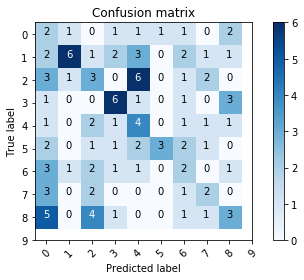

In [29]:
plot_confusion_matrix(cm, list(range(0, 10)), cmap=plt.cm.Blues)